In [ ]:
"""
This notebook tells us about the basics of:
1. how to download datasets such as images 
2. how to access files in the directories
3. using matplotlib.pyplot function to plot images
4. cropping and resizing images for consistency
5. grayscaling the images
6. making dataset batch from the images in the form of numpy array
"""

In [1]:
import os

In [ ]:
# Download the dataset of images online [only the first 10 images]

# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
os.mkdir('img_align_celeba')

# Now perform the following 10 times:
for img_i in range(1, 11):

    # create a string using the current loop counter
    f = '000%03d.jpg' % img_i

    # and get the url with that string appended the end
    url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

    # We'll print this out to the console so we can see how far we've gone
    print(url, end='\r')

    # And now download the url to a location inside our new directory
    urllib.request.urlretrieve(url, os.path.join('img_align_celeba', f))

In [3]:
help(os.listdir)

Help on built-in function listdir in module posix:

listdir(path=None)
    Return a list containing the names of the files in the directory.
    
    path can be specified as either str or bytes.  If path is bytes,
      the filenames returned will also be bytes; in all other circumstances
      the filenames returned will be str.
    If path is None, uses the path='.'.
    On some platforms, path may also be specified as an open file descriptor;\
      the file descriptor must refer to a directory.
      If this functionality is unavailable, using it raises NotImplementedError.
    
    The list is in arbitrary order.  It does not include the special
    entries '.' and '..' even if they are present in the directory.



In [2]:
files = [file_i
         for file_i in os.listdir('img_align_celeba')
         if file_i.endswith('.jpg')]
files

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [ ]:
plt.imread?

In [5]:
import numpy as np

In [6]:
print(os.path.join('img_align_celeba', files[0]))
plt.imread(os.path.join('img_align_celeba', files[0]))

img_align_celeba/000001.jpg


array([[[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [247, 226, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [249, 228, 225],
        [254, 238, 222],
        [254, 238, 222]],

       [[253, 231, 194],
        [253, 231, 194],
        [253, 231, 194],
        ..., 
        [250, 231, 227],
        [255, 239, 223],
        [255, 239, 223]],

       ..., 
       [[140,  74,  26],
        [116,  48,   1],
        [146,  78,  33],
        ..., 
        [122,  55,  28],
        [122,  56,  30],
        [122,  56,  30]],

       [[130,  62,  15],
        [138,  70,  23],
        [166,  98,  53],
        ..., 
        [118,  49,  20],
        [118,  51,  24],
        [118,  51,  24]],

       [[168, 100,  53],
        [204, 136,  89],
        [245, 177, 132],
        ..., 
        [118,  49,  20],
        [120,  50,  24],
        [120,  50,

In [7]:
files = [os.path.join('img_align_celeba', file_i)
 for file_i in os.listdir('img_align_celeba')
 if '.jpg' in file_i]

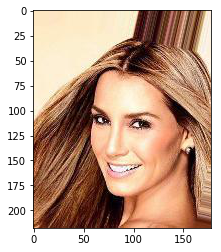

In [8]:
img = plt.imread(files[0])
plt.imshow(img)

In [9]:
# show the dimensions of the image
# rows, cols, Number of frames(R, G, B)
img.shape

(218, 178, 3)

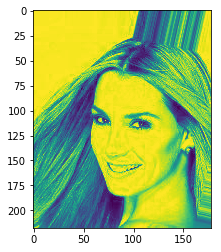

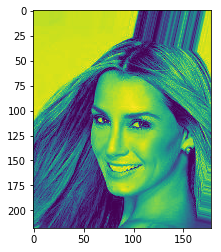

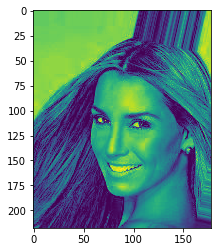

In [10]:
# show R G B color frames respectively
plt.figure()
plt.imshow(img[:, :, 0])
plt.figure()
plt.imshow(img[:, :, 1])
plt.figure()
plt.imshow(img[:, :, 2])

In [11]:
# Min and Max value of the image
# 266 values for 2**8 -> 1 byte per pixel
np.min(img), np.max(img)

(0, 255)

In [12]:
# data type of the image unsigned integer 8 bit
img.dtype

dtype('uint8')

In [13]:
# convert uint8 to float32 for 2**32 possible values instead of 2**8
img.astype(np.float32)

array([[[ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        ..., 
        [ 247.,  226.,  225.],
        [ 254.,  238.,  222.],
        [ 254.,  238.,  222.]],

       [[ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        ..., 
        [ 249.,  228.,  225.],
        [ 254.,  238.,  222.],
        [ 254.,  238.,  222.]],

       [[ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        [ 253.,  231.,  194.],
        ..., 
        [ 250.,  231.,  227.],
        [ 255.,  239.,  223.],
        [ 255.,  239.,  223.]],

       ..., 
       [[ 140.,   74.,   26.],
        [ 116.,   48.,    1.],
        [ 146.,   78.,   33.],
        ..., 
        [ 122.,   55.,   28.],
        [ 122.,   56.,   30.],
        [ 122.,   56.,   30.]],

       [[ 130.,   62.,   15.],
        [ 138.,   70.,   23.],
        [ 166.,   98.,   53.],
        ..., 
        [ 118.,   49.,   20.],
        [ 118.,   51.,   24.],
        [ 

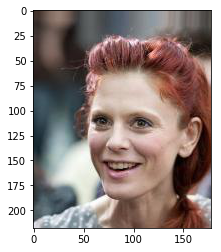

In [14]:
# display random image from the dataset
filename = files[np.random.randint(0, len(files))]
img = plt.imread(filename)
plt.imshow(img)

In [15]:
# function to plot images given their path
def plot_image(filename):
    img = plt.imread(filename)
    plt.imshow(img)

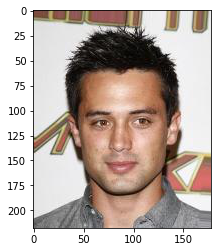

In [16]:
# plot a random image using the plot_image function
plot_image(files[np.random.randint(0, len(files))])

In [17]:
def imcrop_tosquare(img):
    """Make any image a square image.

    Parameters
    ----------
    img : np.ndarray
        Input image to crop, assumed at least 2d.

    Returns
    -------
    crop : np.ndarray
        Cropped image.
    """
    
    # if rows are more than columns
    if img.shape[0] > img.shape[1]:
        extra = (img.shape[0] - img.shape[1])
        if extra % 2 == 0:
            crop = img[extra // 2:-extra // 2, :]
        else:
            crop = img[max(0, extra // 2 + 1):min(-1, -(extra // 2)), :]
            
    # if columns are more than rows        
    elif img.shape[1] > img.shape[0]:
        extra = (img.shape[1] - img.shape[0])
        if extra % 2 == 0:
            crop = img[:, extra // 2:-extra // 2]
        else:
            crop = img[:, max(0, extra // 2 + 1):min(-1, -(extra // 2))]
            
    # if rows = columns
    else:
        crop = img
    return crop

In [18]:
# function to crop the image given the amount to reduce between [0 and 1] 
def imcrop(img, amt):
    if amt <= 0 or amt >= 1:
        return img
    row_i = int(img.shape[0] * amt) // 2
    col_i = int(img.shape[1] * amt) // 2
    return img[row_i:-row_i, col_i:-col_i]

In [19]:
# import imresize function from scipy to make all the square images of the same sizes
from scipy.misc import imresize

before resize: 
After resize: 


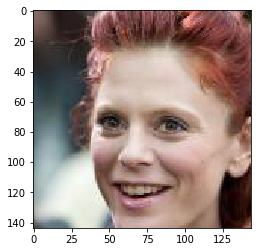

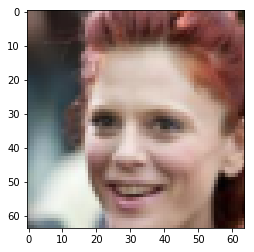

In [21]:
square = imcrop_tosquare(img)
crop = imcrop(square, 0.2)

plt.figure()
print("before resize: ")
plt.imshow(crop, interpolation='nearest')
# convert image to 64 rows and 64 columns
rsz = imresize(crop, (64, 64))


plt.figure()
# get less blurred image -> interpolation='nearest'
print("After resize: ")
plt.imshow(rsz, interpolation='nearest')

(64, 64)


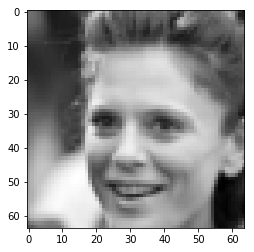

In [22]:
# get mean of image according to RGB values and print in Grey scale
mean_img = np.mean(rsz, axis=2)
print(mean_img.shape)
plt.imshow(mean_img, cmap='gray')

In [23]:
# crop and resize all the images in the dataset
imgs = []
for file_i in files:
    img = plt.imread(file_i)
    square = imcrop_tosquare(img)
    crop = imcrop(square, 0.2)
    rsz = imresize(crop, (64, 64))
    imgs.append(rsz)
print(len(imgs))

10


In [24]:
# new dimensions of the images
imgs[0].shape

(64, 64, 3)

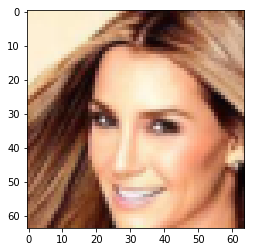

In [25]:
plt.imshow(imgs[0])

In [26]:
# create the data set or numpy array of all the images by adding an extra dimension
""" 
N x R x C x F
N -> number of images
R -> number of rows in each image
C -> number of cols in each image
F -> number of frames in image (RGB)
"""
data = np.array(imgs)
data.shape

(10, 64, 64, 3)